# Dementia Detection in Alzheimer's Patients

## 1. Business Understanding

### 1.1 Overview
Alzheimer's disease is a neurodegenerative disorder that is characterized by memory loss, cognitive decline, and personality changes. It is the most common cause of dementia, and it typically affects people over the age of 65. In Alzheimer's disease, nerve cells in the brain die, leading to a loss of function in the areas of the brain that control memory, language, and other cognitive abilities. There is currently no cure for Alzheimer's disease, but there are treatments that can help manage the symptoms. 

Alzheimer's disease typically progresses through four stages: pre-dementia, mild cognitive impairment, moderate cognitive impairment, and severe cognitive impairment.
1. Pre-dementia: In the pre-dementia stage, people may have mild memory problems, but they are still able to function independently.
2. Mild cognitive impairment: In this stage, people may have more noticeable memory problems, as well as difficulty with language, planning, and problem-solving. They may also have trouble with spatial orientation, such as getting lost in familiar places.
3. Moderate cognitive impairment: In this stage, people may have significant memory problems, as well as difficulty with language and other cognitive abilities. They may also experience changes in their mood and behavior, and may need assistance with daily activities.
4. Severe cognitive impairment: In the final stage of Alzheimer's disease, people may lose the ability to communicate and may become completely dependent on others for their care. They may also experience changes in their sleep patterns and may have difficulty swallowing.

#### Symptoms
* Cognitive: mental decline, difficulty thinking and understanding, confusion in the evening hours, delusion, disorientation, forgetfulness, making things up, mental confusion, difficulty concentrating, inability to create new memories, inability to do simple math, or inability to recognise common things
* Behavioural: aggression, agitation, difficulty with self care, irritability, meaningless repetition of own words, personality changes, restlessness, lack of restraint, or wandering and getting lost
* Mood: anger, apathy, general discontent, loneliness, or mood swings
* Psychological: depression, hallucination, or paranoia
* Also common: appetite loss, difficulty with skilled movement, or paraphasia




### 1.2 Problem Statement
According to the Alzheimer's association, AD is the sixth leading cause of death in the United states and is expected to become 4 times as of now by the end of 2050.
The main challenge that neurologists are facing is that it is very difficult for them to detect alzheimer's during its early stages making it easy for them to miss AD in its early stages after which patients can barely be savaged.
Our project will use deep learning techniques to build a model that will accurately classify the stage of the disease and with that, early and mild symptomatic patients will be able to get treatment to manage their symptoms, and plan for the future.


### 1.3 Business Objectives
#### General Objective
* To obtain a data-driven solution that will allow for early detection of Alzheimer's disease.
#### Specific Objectives
* To develop a model that will classify brain images according to the stage of Alzheimer’s disease.
* To use brain images to identify early signs of Alzheimer’s disease in order to allow for earlier intervention and potentially improve patient outcomes
* To develop a web-based application that will allow users to upload brain scans and view the model’s prediction.
* To suggest next steps to users depending on the model’s prediction.

### 1.4 Research Questions
* Which model will best classify brain images based on the stage of Alzheimer's disease?
* What are the next steps for this project?
* Which gender is most affected by Alzheimer's disease?


### 1.5Metric of Success
* Our metric of success is a recall of 95% and above. We went with recall because in a medical dataset, a high recall is considered to be more important rather than a high precision. It is more important to avoid missing potentially harmful cases (i.e. false negatives) than to minimize the number of false positives. A high recall means that most of the actual  positive cases are being correctly identified.


## Data Understanding

The datasets used were sourced from kaggle. The datasets describe the brain features that were used in our modelling. 

Below are the column descriptions:

- Subject.ID: Unique identifier for the Alzheimer's patients.

- MRI.ID: Unique identifier for the MRI scans

- Group (Converted / Demented / Nondemented): The column tells whether the Alzheimers patient is demented or not also whether the patient was the patient was non demented but was diagnosed as demented after a couple of visits.

- Visit - Number of visit: The number of times the patient 

- MR.Delay - Time between injection and the MRI scan.

Demographics Info

- M.F - Gender of the patient. 
- Hand - Handedness (actually all subjects were right-handed so I will drop this column)
- Age - Age of the patient
- EDUC - Years of education
- SES - Socioeconomic status as assessed by the Hollingshead Index of Social Position and classified into categories from 1 (highest status) to 5 (lowest status)

Clinical Info

- MMSE - Mini-Mental State Examination score (range is from 0 = worst to 30 = best)
- CDR - Clinical Dementia Rating (0 = no dementia, 0.5 = very mild dementia, 1 = mild dementia, 2 = moderate dementia)

Derived Anatomic Volumes

- eTIV - Estimated total intracranial volume, mm3
- nWBV - Normalized whole-brain volume, expressed as a percent of all voxels in the atlas-masked image that are labeled as gray or white matter by the automated tissue segmentation process
- ASF - Atlas scaling factor (unitless). Computed scaling factor that transforms native-space brain and skull to the atlas target (i.e., the determinant of the transform matrix)

## Importing Necessary Packages

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
import warnings

# filter warnings
warnings.filterwarnings("ignore")

In [40]:
# load dataset
dataset_1 = pd.read_csv("oasis_cross-sectional.csv")
dataset_2 = pd.read_csv("oasis_longitudinal.csv")

In [41]:
long = dataset_2.copy()
long.columns

Index(['Subject ID', 'MRI ID', 'Group', 'Visit', 'MR Delay', 'M/F', 'Hand',
       'Age', 'EDUC', 'SES', 'MMSE', 'CDR', 'eTIV', 'nWBV', 'ASF'],
      dtype='object')

## Data Understanding

In [42]:
# function for exploring the data 
class DatasetChecker:
        def __init__(self, dataset):
            self.dataset = dataset
            
        def check_first_rows(self):
            # Print the first five rows of the dataset
            print("First five rows:")
            return self.dataset.head()
        
        def check_last_rows(self):
            print("Last five rows:")
            return self.dataset.tail()
        
        def check_shape(self):
            # Print the shape of the dataset
            print("Shape of dataset")
            return self.dataset.shape
        
        def check_info(self):
            # print information on dataset
            print("Information on dataset:")
            return self.dataset.info()
        
        def check_description(self):
            # print the summary statistics of dataset
            print("Summary statistics")
            return self.dataset.describe()
        
        def check_data_types(self):
            # Print the data types of the columns in the dataset
            print("Data types:")
            return self.dataset.dtypes
        
        def check_missing_values(self):
            # Print the number of missing values
            print("Number of missing values")
            return self.dataset.isna().sum()
        
            
# Create a list of methods from the DatasetChecker class

methods = [DatasetChecker.check_first_rows, DatasetChecker.check_last_rows, DatasetChecker.check_shape,
           DatasetChecker.check_info, DatasetChecker.check_description, 
           DatasetChecker.check_data_types,DatasetChecker.check_missing_values]

In [43]:
# Create an instance of the DatasetChecker class for the first dataset
checker1 = DatasetChecker(dataset_1)

# Use a for loop to iterate over the methods in the list
for method in methods:
  # Call the method on the instance, passing no arguments
    result = method(checker1)
    display(result)

First five rows:


,ID,M/F,Hand,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF,Delay
0,OAS1_0001_MR1,F,R,74,2.0,3.0,29.0,0.0,1344,0.743,1.306,NaN
1,OAS1_0002_MR1,F,R,55,4.0,1.0,29.0,0.0,1147,0.810,1.531,NaN
2,OAS1_0003_MR1,F,R,73,4.0,3.0,27.0,0.5,1454,0.708,1.207,NaN
3,OAS1_0004_MR1,M,R,28,NaN,NaN,NaN,NaN,1588,0.803,1.105,NaN
4,OAS1_0005_MR1,M,R,18,NaN,NaN,NaN,NaN,1737,0.848,1.010,NaN


Last five rows:


,ID,M/F,Hand,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF,Delay
431,OAS1_0285_MR2,M,R,20,NaN,NaN,NaN,NaN,1469,0.847,1.195,2.0
432,OAS1_0353_MR2,M,R,22,NaN,NaN,NaN,NaN,1684,0.790,1.042,40.0
433,OAS1_0368_MR2,M,R,22,NaN,NaN,NaN,NaN,1580,0.856,1.111,89.0
434,OAS1_0379_MR2,F,R,20,NaN,NaN,NaN,NaN,1262,0.861,1.390,2.0
435,OAS1_0395_MR2,F,R,26,NaN,NaN,NaN,NaN,1283,0.834,1.368,39.0


Shape of dataset


(436, 12)

Information on dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 436 entries, 0 to 435
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      436 non-null    object 
 1   M/F     436 non-null    object 
 2   Hand    436 non-null    object 
 3   Age     436 non-null    int64  
 4   Educ    235 non-null    float64
 5   SES     216 non-null    float64
 6   MMSE    235 non-null    float64
 7   CDR     235 non-null    float64
 8   eTIV    436 non-null    int64  
 9   nWBV    436 non-null    float64
 10  ASF     436 non-null    float64
 11  Delay   20 non-null     float64
dtypes: float64(7), int64(2), object(3)
memory usage: 41.0+ KB


None

Summary statistics


,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF,Delay
count,436.000000,235.000000,216.000000,235.00000,235.000000,436.000000,436.000000,436.000000,20.00000
mean,51.357798,3.178723,2.490741,27.06383,0.285106,1481.919725,0.791670,1.198894,20.55000
std,25.269862,1.311510,1.120593,3.69687,0.383405,158.740866,0.059937,0.128682,23.86249
min,18.000000,1.000000,1.000000,14.00000,0.000000,1123.000000,0.644000,0.881000,1.00000
25%,23.000000,2.000000,2.000000,26.00000,0.000000,1367.750000,0.742750,1.111750,2.75000
50%,54.000000,3.000000,2.000000,29.00000,0.000000,1475.500000,0.809000,1.190000,11.00000
75%,74.000000,4.000000,3.000000,30.00000,0.500000,1579.250000,0.842000,1.284250,30.75000
max,96.000000,5.000000,5.000000,30.00000,2.000000,1992.000000,0.893000,1.563000,89.00000


Data types:


ID        object
M/F       object
Hand      object
Age        int64
Educ     float64
SES      float64
MMSE     float64
CDR      float64
eTIV       int64
nWBV     float64
ASF      float64
Delay    float64
dtype: object

Number of missing values


ID         0
M/F        0
Hand       0
Age        0
Educ     201
SES      220
MMSE     201
CDR      201
eTIV       0
nWBV       0
ASF        0
Delay    416
dtype: int64

#### Observations

- The dataset has 436 rows and 12 columns. 
- Both the head and tail have the same number of columns indicating that our dataset is consistent.
- Out of the 12 columns, 9 are numeric while 3 are of object type.
- The following columns have missing values:
    - Educ - 201
    - SES - 220
    - MMSE - 201
    - CDR - 201
    - Delay - 416

In [44]:
# Create an instance of the DatasetChecker class for the second dataset
checker2 = DatasetChecker(dataset_2)

# Use a for loop to iterate over the methods in the list
for method in methods:
  # Call the method on the instance, passing no arguments
    result = method(checker2)
    display(result)

First five rows:


,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034


Last five rows:


,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
368,OAS2_0185,OAS2_0185_MR2,Demented,2,842,M,R,82,16,1.0,28.0,0.5,1693,0.694,1.037
369,OAS2_0185,OAS2_0185_MR3,Demented,3,2297,M,R,86,16,1.0,26.0,0.5,1688,0.675,1.040
370,OAS2_0186,OAS2_0186_MR1,Nondemented,1,0,F,R,61,13,2.0,30.0,0.0,1319,0.801,1.331
371,OAS2_0186,OAS2_0186_MR2,Nondemented,2,763,F,R,63,13,2.0,30.0,0.0,1327,0.796,1.323
372,OAS2_0186,OAS2_0186_MR3,Nondemented,3,1608,F,R,65,13,2.0,30.0,0.0,1333,0.801,1.317


Shape of dataset


(373, 15)

Information on dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Subject ID  373 non-null    object 
 1   MRI ID      373 non-null    object 
 2   Group       373 non-null    object 
 3   Visit       373 non-null    int64  
 4   MR Delay    373 non-null    int64  
 5   M/F         373 non-null    object 
 6   Hand        373 non-null    object 
 7   Age         373 non-null    int64  
 8   EDUC        373 non-null    int64  
 9   SES         354 non-null    float64
 10  MMSE        371 non-null    float64
 11  CDR         373 non-null    float64
 12  eTIV        373 non-null    int64  
 13  nWBV        373 non-null    float64
 14  ASF         373 non-null    float64
dtypes: float64(5), int64(5), object(5)
memory usage: 43.8+ KB


None

Summary statistics


,Visit,MR Delay,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
count,373.000000,373.000000,373.000000,373.000000,354.000000,371.000000,373.000000,373.000000,373.000000,373.000000
mean,1.882038,595.104558,77.013405,14.597855,2.460452,27.342318,0.290885,1488.128686,0.729568,1.195461
std,0.922843,635.485118,7.640957,2.876339,1.134005,3.683244,0.374557,176.139286,0.037135,0.138092
min,1.000000,0.000000,60.000000,6.000000,1.000000,4.000000,0.000000,1106.000000,0.644000,0.876000
25%,1.000000,0.000000,71.000000,12.000000,2.000000,27.000000,0.000000,1357.000000,0.700000,1.099000
50%,2.000000,552.000000,77.000000,15.000000,2.000000,29.000000,0.000000,1470.000000,0.729000,1.194000
75%,2.000000,873.000000,82.000000,16.000000,3.000000,30.000000,0.500000,1597.000000,0.756000,1.293000
max,5.000000,2639.000000,98.000000,23.000000,5.000000,30.000000,2.000000,2004.000000,0.837000,1.587000


Data types:


Subject ID     object
MRI ID         object
Group          object
Visit           int64
MR Delay        int64
M/F            object
Hand           object
Age             int64
EDUC            int64
SES           float64
MMSE          float64
CDR           float64
eTIV            int64
nWBV          float64
ASF           float64
dtype: object

Number of missing values


Subject ID     0
MRI ID         0
Group          0
Visit          0
MR Delay       0
M/F            0
Hand           0
Age            0
EDUC           0
SES           19
MMSE           2
CDR            0
eTIV           0
nWBV           0
ASF            0
dtype: int64

#### Observations

- The dataset has 373 rows and 15 columns.
- Both the head and tail have the same number of columns indicating that our dataset is consistent.
- Out of the 15 columns, 10 are numeric while 5 are of object type.
- The following columns have missing values:
    - SES - 19
    - MMSE - 2

## Data Preparation

#### Validity

We chose to drop the following columns:

* `ID`, `Subject ID`, `MRI ID`, `Visit` - we don't need unique identifiers for our analysis
* `Hand` -  All subjects chosen for the study were right-handed hence no comparison can be done
* `Delay`, `MR Delay` - Only has 20 non-null values out of 436
* `Group` - We have the CDR column which serves a similar purpose

In [45]:
# Drop irrelevant columns in dataset_1
dataset_1.drop(columns=['ID', 'Hand', 'Delay'], inplace=True)
# Drop irrelevant columns in dataset_2
dataset_2.drop(columns=['Subject ID', 'MRI ID', 'Hand', 'MR Delay', 'Group','Visit'], inplace=True)

#### Consistency

We will rename the `EDUC` column in dataset_2 to match the `Educ` column in dataset_1

In [46]:
#Rename the EDUC column
dataset_2 = dataset_2.rename(columns={'EDUC':'Educ'})

Now that we have dropped the irrelevant columns and also made the column descriptions consistent, we will merge the two datasets

In [47]:
# Merge dataset_1 and dataset_2
merged_df = pd.concat([dataset_1, dataset_2])
merged_df

,M/F,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF
0,F,74,2.0,3.0,29.0,0.0,1344,0.743,1.306
1,F,55,4.0,1.0,29.0,0.0,1147,0.810,1.531
2,F,73,4.0,3.0,27.0,0.5,1454,0.708,1.207
3,M,28,NaN,NaN,NaN,NaN,1588,0.803,1.105
4,M,18,NaN,NaN,NaN,NaN,1737,0.848,1.010
...,...,...,...,...,...,...,...,...,...
368,M,82,16.0,1.0,28.0,0.5,1693,0.694,1.037
369,M,86,16.0,1.0,26.0,0.5,1688,0.675,1.040
370,F,61,13.0,2.0,30.0,0.0,1319,0.801,1.331
371,F,63,13.0,2.0,30.0,0.0,1327,0.796,1.323


We will now use the DatasetChecker class to look into the various features of the merged_df

In [48]:
# Create an instance of the DatasetChecker class for the third dataset
checker3 = DatasetChecker(merged_df)

# Use a for loop to iterate over the methods in the list
for method in methods:
  # Call the method on the instance, passing no arguments
    result = method(checker3)
    display(result)

First five rows:


,M/F,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF
0,F,74,2.0,3.0,29.0,0.0,1344,0.743,1.306
1,F,55,4.0,1.0,29.0,0.0,1147,0.810,1.531
2,F,73,4.0,3.0,27.0,0.5,1454,0.708,1.207
3,M,28,NaN,NaN,NaN,NaN,1588,0.803,1.105
4,M,18,NaN,NaN,NaN,NaN,1737,0.848,1.010


Last five rows:


,M/F,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF
368,M,82,16.0,1.0,28.0,0.5,1693,0.694,1.037
369,M,86,16.0,1.0,26.0,0.5,1688,0.675,1.040
370,F,61,13.0,2.0,30.0,0.0,1319,0.801,1.331
371,F,63,13.0,2.0,30.0,0.0,1327,0.796,1.323
372,F,65,13.0,2.0,30.0,0.0,1333,0.801,1.317


Shape of dataset


(809, 9)

Information on dataset:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 809 entries, 0 to 372
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   M/F     809 non-null    object 
 1   Age     809 non-null    int64  
 2   Educ    608 non-null    float64
 3   SES     570 non-null    float64
 4   MMSE    606 non-null    float64
 5   CDR     608 non-null    float64
 6   eTIV    809 non-null    int64  
 7   nWBV    809 non-null    float64
 8   ASF     809 non-null    float64
dtypes: float64(6), int64(2), object(1)
memory usage: 63.2+ KB


None

Summary statistics


,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF
count,809.000000,608.000000,570.00000,606.000000,608.000000,809.000000,809.000000,809.000000
mean,63.186650,10.184211,2.47193,27.234323,0.288651,1484.782447,0.763037,1.197311
std,23.117511,6.058388,1.12805,3.687980,0.377697,166.911689,0.059401,0.133031
min,18.000000,1.000000,1.00000,4.000000,0.000000,1106.000000,0.644000,0.876000
25%,49.000000,4.000000,2.00000,26.000000,0.000000,1361.000000,0.715000,1.108000
50%,72.000000,12.000000,2.00000,29.000000,0.000000,1475.000000,0.754000,1.190000
75%,80.000000,16.000000,3.00000,30.000000,0.500000,1583.000000,0.817000,1.290000
max,98.000000,23.000000,5.00000,30.000000,2.000000,2004.000000,0.893000,1.587000


Data types:


M/F      object
Age       int64
Educ    float64
SES     float64
MMSE    float64
CDR     float64
eTIV      int64
nWBV    float64
ASF     float64
dtype: object

Number of missing values


M/F       0
Age       0
Educ    201
SES     239
MMSE    203
CDR     201
eTIV      0
nWBV      0
ASF       0
dtype: int64

We observed missing values in the following columns:
* Educ - 201
* SES - 239
* MMSE - 203
* CDR -201

In [49]:
# Function for checking percentage of missing values
def missing_values(data):
     """
     Identify the missing values and their percentages
     Drop values that have no missing values
     Return only data with missing values
     """
     miss_val = data.isna().sum().sort_values(ascending = False)
     percentage = (data.isna().sum() / len(data)*100).sort_values(ascending = False)
     missing_values = pd.DataFrame({"Missing Values": miss_val, "In Percentage": percentage})
     return missing_values

In [50]:
# check percentage of missing values
missing_values(merged_df)

,Missing Values,In Percentage
SES,239,29.542645
MMSE,203,25.092707
Educ,201,24.845488
CDR,201,24.845488
M/F,0,0.000000
Age,0,0.000000
eTIV,0,0.000000
nWBV,0,0.000000
ASF,0,0.000000


#### Consistency

Since `Educ`, `SES` and `MMSE` have a significant percentage of missing values, we decided to use Linear Regression to replace the values. We will use Measures of Central Tendency to replace missing values in `CDR`.

In [51]:
# Create the testing data fo each column
test_data_educ = merged_df[merged_df['Educ'].isnull()].drop(columns=['M/F','SES','MMSE','CDR'])
test_data_SES = merged_df[merged_df['SES'].isnull()].drop(columns=['M/F','Educ','MMSE','CDR'])
test_data_MMSE = merged_df[merged_df['MMSE'].isnull()].drop(columns=['M/F','Educ','SES','CDR'])
test_data_CDR = merged_df[merged_df['CDR'].isnull()].drop(columns=['M/F','Educ','SES','MMSE'])

# create a dataframe with no missing values
cleaned_df = merged_df.dropna()

# create y_train for each column
y_train_educ = cleaned_df['Educ']
y_train_SES = cleaned_df['SES']
y_train_MMSE = cleaned_df['MMSE']
y_train_CDR = cleaned_df['CDR']

#create x_train for each column
x_train_educ = cleaned_df.drop(['Educ','M/F','SES','MMSE','CDR'], axis=1)
x_train_SES = cleaned_df.drop(['Educ','M/F','SES','MMSE','CDR'], axis=1)
x_train_MMSE = cleaned_df.drop(['Educ','M/F','SES','MMSE','CDR'], axis=1)
x_train_CDR = cleaned_df.drop(['Educ','M/F','SES','MMSE','CDR'], axis=1)

# instantiate models for each column
lr_educ = LinearRegression()
lr_SES = LinearRegression()
lr_MMSE = LinearRegression()
lr_CDR = LinearRegression()

# fit the training data for each model
lr_educ.fit(x_train_educ,y_train_educ)
lr_SES.fit(x_train_SES,y_train_SES)
lr_MMSE.fit(x_train_MMSE,y_train_MMSE)
lr_CDR.fit(x_train_CDR,y_train_CDR)

# create testing data for each column
x_test_educ = test_data_educ.drop('Educ', axis=1)
x_test_SES = test_data_SES.drop('SES', axis=1)
x_test_MMSE = test_data_MMSE.drop('MMSE', axis=1)
x_test_CDR = test_data_CDR.drop('CDR', axis=1)

# predict values for each column
y_pred_educ = lr_educ.predict(x_test_educ)
y_pred_SES = lr_SES.predict(x_test_SES)
y_pred_MMSE = lr_MMSE.predict(x_test_MMSE)
y_pred_CDR = lr_CDR.predict(x_test_CDR)

# replace missing values for each column with the predict values respectively
merged_df.loc[merged_df['Educ'].isnull(), 'Educ'] = y_pred_educ.astype('i')
merged_df.loc[merged_df['SES'].isnull(), 'SES'] = np.round(y_pred_SES, 1)
merged_df.loc[merged_df['MMSE'].isnull(), 'MMSE'] = y_pred_MMSE.astype('i')
merged_df.loc[merged_df['CDR'].isnull(), 'CDR'] = np.round(y_pred_CDR, 1)

# function to round off to the nearest 0.5
def round_to_nearest_half_int(num):
    return round(num * 2) / 2

# round off CDR column to the nearest 0.5
merged_df['CDR'] = merged_df.CDR.apply(lambda x:round_to_nearest_half_int(x))

In [52]:
# Create an instance of the DatasetChecker class for the cleaned merged dataset
checker4 = DatasetChecker(merged_df)

# Use a for loop to iterate over the methods in the list
for method in methods:
  # Call the method on the instance, passing no arguments
    result = method(checker4)
    display(result)

First five rows:


,M/F,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF
0,F,74,2.0,3.0,29.0,0.0,1344,0.743,1.306
1,F,55,4.0,1.0,29.0,0.0,1147,0.810,1.531
2,F,73,4.0,3.0,27.0,0.5,1454,0.708,1.207
3,M,28,6.0,2.0,26.0,0.5,1588,0.803,1.105
4,M,18,6.0,1.6,27.0,0.0,1737,0.848,1.010


Last five rows:


,M/F,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF
368,M,82,16.0,1.0,28.0,0.5,1693,0.694,1.037
369,M,86,16.0,1.0,26.0,0.5,1688,0.675,1.040
370,F,61,13.0,2.0,30.0,0.0,1319,0.801,1.331
371,F,63,13.0,2.0,30.0,0.0,1327,0.796,1.323
372,F,65,13.0,2.0,30.0,0.0,1333,0.801,1.317


Shape of dataset


(809, 9)

Information on dataset:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 809 entries, 0 to 372
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   M/F     809 non-null    object 
 1   Age     809 non-null    int64  
 2   Educ    809 non-null    float64
 3   SES     809 non-null    float64
 4   MMSE    809 non-null    float64
 5   CDR     809 non-null    float64
 6   eTIV    809 non-null    int64  
 7   nWBV    809 non-null    float64
 8   ASF     809 non-null    float64
dtypes: float64(6), int64(2), object(1)
memory usage: 63.2+ KB


None

Summary statistics


,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF
count,809.000000,809.000000,809.000000,809.000000,809.000000,809.000000,809.000000,809.000000
mean,63.186650,9.056860,2.378863,27.245983,0.242892,1484.782447,0.763037,1.197311
std,23.117511,5.647371,0.971658,3.232349,0.351837,166.911689,0.059401,0.133031
min,18.000000,1.000000,0.300000,4.000000,0.000000,1106.000000,0.644000,0.876000
25%,49.000000,4.000000,2.000000,27.000000,0.000000,1361.000000,0.715000,1.108000
50%,72.000000,7.000000,2.100000,28.000000,0.000000,1475.000000,0.754000,1.190000
75%,80.000000,14.000000,3.000000,29.000000,0.500000,1583.000000,0.817000,1.290000
max,98.000000,23.000000,5.000000,30.000000,2.000000,2004.000000,0.893000,1.587000


Data types:


M/F      object
Age       int64
Educ    float64
SES     float64
MMSE    float64
CDR     float64
eTIV      int64
nWBV    float64
ASF     float64
dtype: object

Number of missing values


M/F     0
Age     0
Educ    0
SES     0
MMSE    0
CDR     0
eTIV    0
nWBV    0
ASF     0
dtype: int64

As observed above we have no missing values

# EXPLORATORY DATA ANALYSIS (EDA)

* In this section, we aim to further probe our data so as to get a deeper understanding of our dataset.

## Univariate

* Univariate analysis is a statistical technique that involves analyzing a single variable at a time. The goal of univariate analysis is to describe and summarize the main characteristics of the data

In [53]:
# Fuction to get the value counts of the data in the columns
def get_value_counts(df, col):
    ''' Returns the value counts of a column in a dataframe '''
    counts = df[col].value_counts(dropna=False, ascending=False)
    return counts

# Function to visualise the value counts in the columns
def plot_data(df, col, title):
    
    fig, ax = plt.subplots(figsize=(10, 5))
    
    ''' Plots the value counts of the categories of a column in a dataframe as a bar chart '''
    
    get_value_counts(df, col).plot(kind='bar', figsize=(15, 5), color='#037bfc', edgecolor='black', fontsize=10)
    plt.title(title)
    plt.xticks(rotation=90)
    plt.ylabel('Count', fontsize=10)

F    481
M    328
Name: M/F, dtype: int64


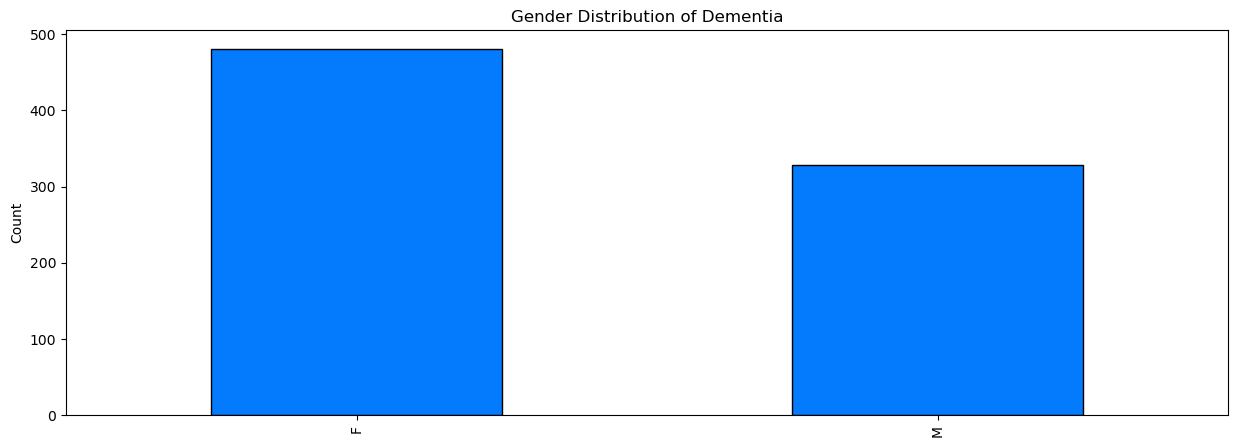

In [54]:
#Getting the value counts for the gender columns
print(get_value_counts(merged_df, "M/F"))

#Visualizing the gender distribution
plot_data(merged_df, "M/F", "Gender Distribution of Dementia")

In [55]:
# plotting pie charts
def pie_charts(name):
    figure = plt.pie(merged_df[name].value_counts(), labels = merged_df[name].unique(), startangle = 90, shadow = True,
                autopct = "%2.1f%%");
    plt.title(name)
    return figure

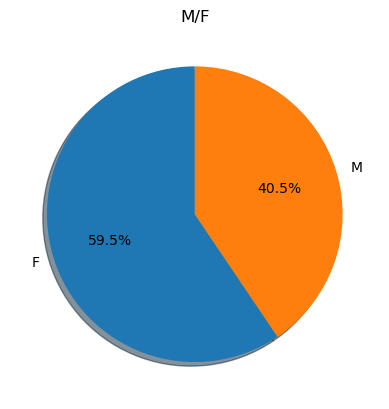

In [56]:
# view gender distribution
pie_charts("M/F");

Females have a higher rate of dementia. From our data, we have 481(59.5%) demented females and 328(40.5%) demented males.

In [57]:
# function to plot kde plots
def plot(df,col, y = 0):
    facet= sns.FacetGrid(df, aspect=3).set(title= f"KDE Plot for {col}")
    facet.map(sns.kdeplot, col ,shade= True)
    facet.set(xlim=(y, df[col].max()))
    facet.add_legend();

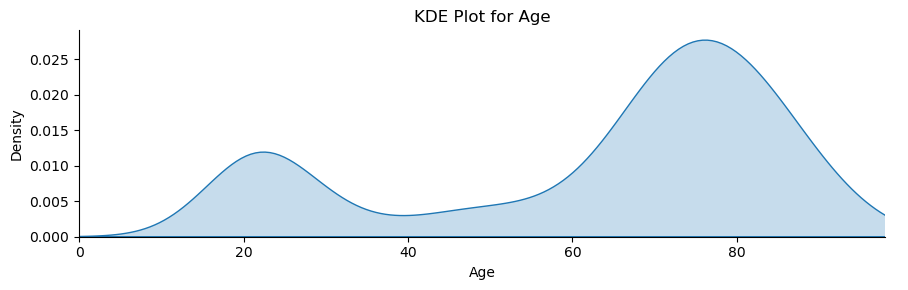

In [58]:
#Plotting the KDE Plot for Age
plot(merged_df,'Age');

This plot is bimodal and is negatively skewed. It shows that people above 75 have a higher probability of having dementia.

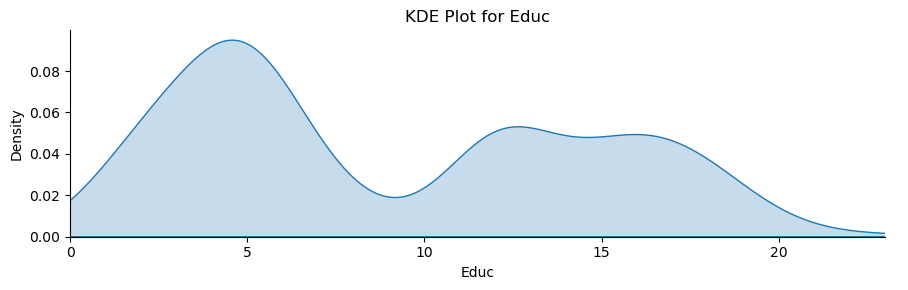

In [59]:
#Plotting the KDE Plot for Educ
plot(merged_df,"Educ")

The plot is positively skewed and has a light tail. The highest probability density is at around 5 years.


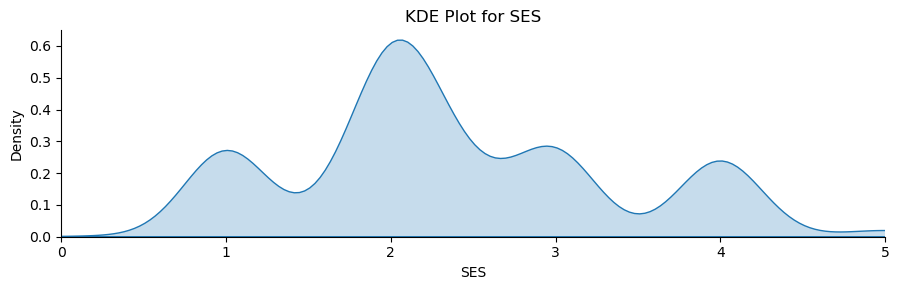

In [60]:
#Plotting the KDE Plot for SES
plot(merged_df,"SES")

The plot is multimodal and the highest probability density is at around 2.

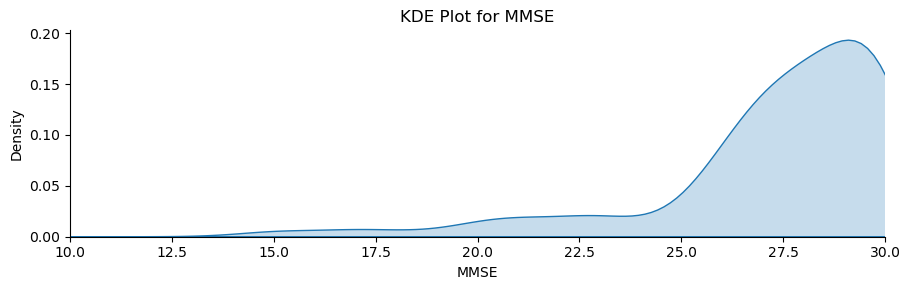

In [61]:
#Plotting the KDE Plot for MMSE
plot(merged_df,"MMSE", y = 10)

The plot is negatively skewed and the highest probablity density is approximately 29.

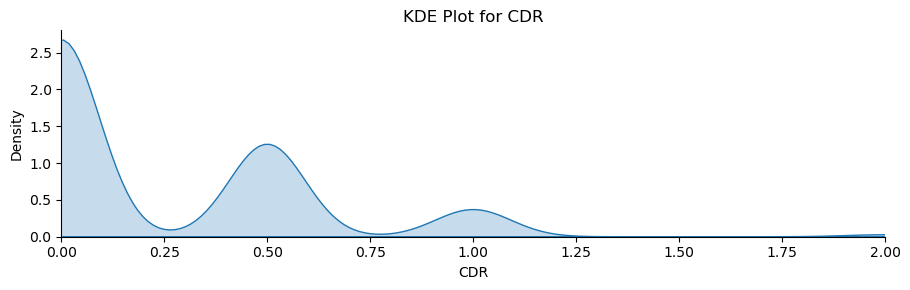

In [62]:
#Plotting the KDE Plot for CDR
plot(merged_df,"CDR")

The plot is multimodal and is positively skewed with the heighest probability density being approximately 0. This means that most of the people in the dataset had no dementia.

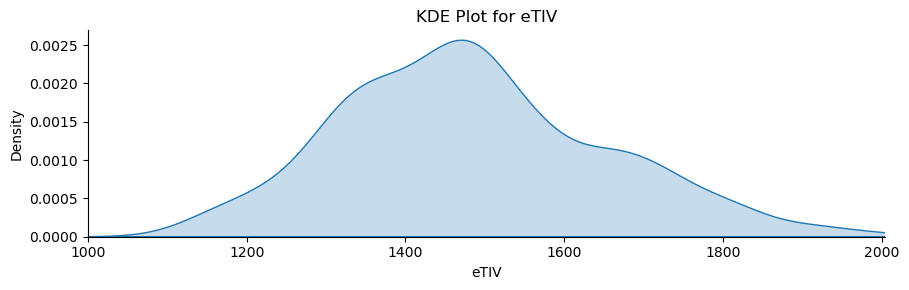

In [63]:
#Plotting the KDE Plot for eTIV
plot(merged_df,"eTIV", y = 1000)

This plot is unimodal and the distribution is fairly uniform. It has a long tail and the the highest probability density is approximately 1500 mm3.

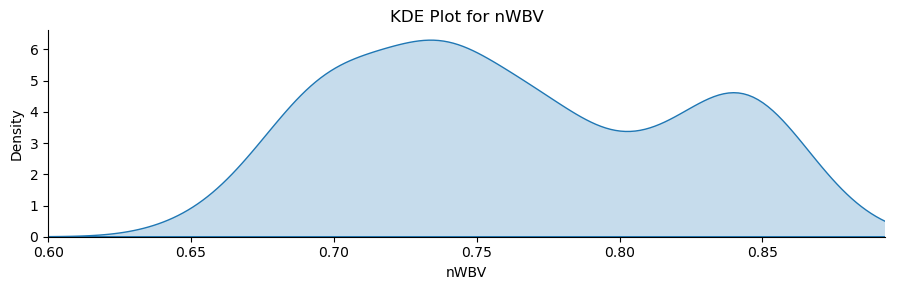

In [64]:
#Plotting the KDE Plot for nWBV
plot(merged_df,"nWBV", y = 0.6)

The highest probability density is approximately 0.74%.

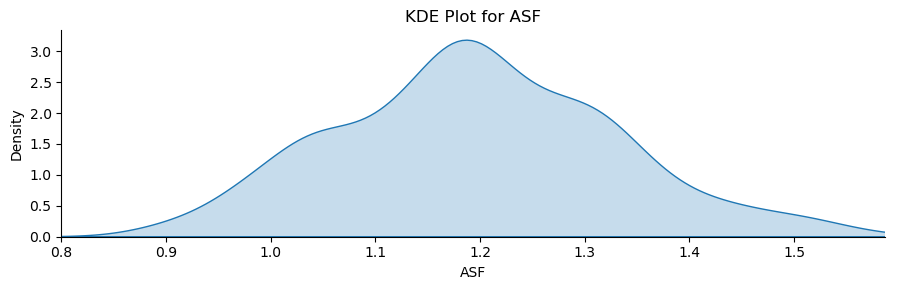

In [65]:
#Plotting the KDE Plot for ASF
plot(merged_df,"ASF", y = 0.8)

This plot is unimodal and is uniformly distributed. It has a long tail and the the highest probability density is approximately 1.2

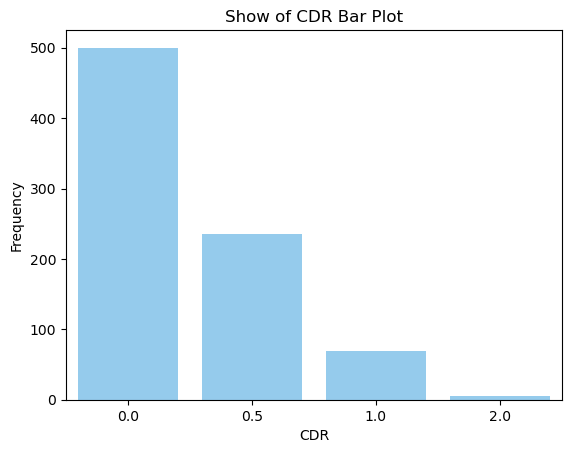

In [66]:
# A Barplot of CDR Frequency
sns.barplot(x=merged_df['CDR'].value_counts().index,
              y=merged_df['CDR'].value_counts().values, color='#87CEFA')
plt.xlabel('CDR')
plt.ylabel('Frequency')
plt.title('Show of CDR Bar Plot')
plt.show()

The number of affected patients reduces as the severity of dementia increases.

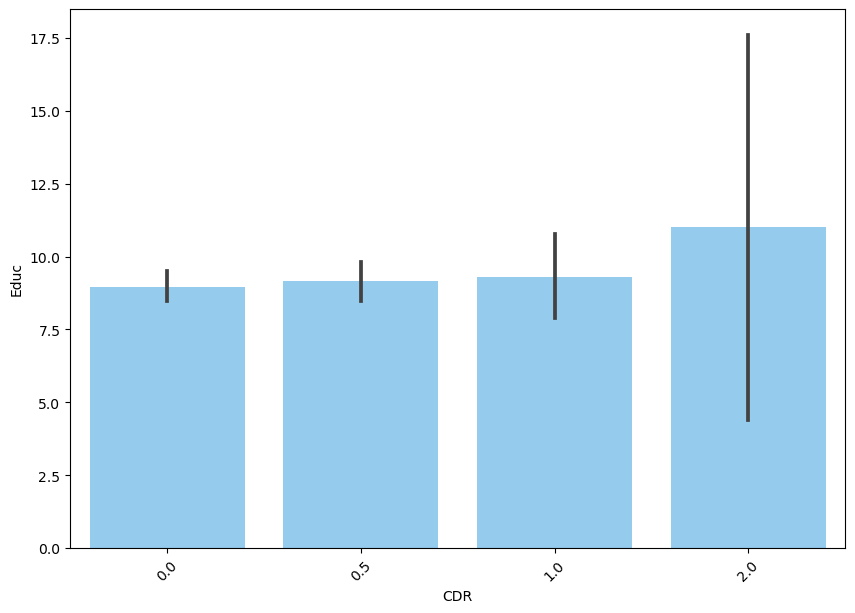

In [83]:
# A Barplot of CDR and Educ
plt.figure(figsize=(10,7))
sns.barplot(x = "CDR", y = "Educ", data = merged_df, color='#87CEFA')

plt.xticks(rotation=45)
plt.show()

In [ ]:
Patients who are moderately demented generally have more years of education.

#### Summary of Univariate Analysis

* Females(59.5%) have a higher rate of dementia than males(40.5%).
* People above 75 years have a higher probability of having dementia.
* People with approximately 5 years of education have a higher probability of having dementia.
* People with a value of 2 (second highest) SES have a higher probability of having dementia.
* A majority of people scored above 25 in the MMSE test.
* The average Estimated total intracranial volume is 1500 mm3
* The average Normalized whole-brain volume is 75%.
* The average Atlas scaling factor is 1.2 .

### Bivariate

Bivariate analysis is a statistical method used to examine the relationship between two variables.

In [67]:
# function to plot side by side chart
def bivariate(name, hue):
    '''A function to visualize a countplot of different columns'''
    figure = sns.countplot(x = merged_df[name], hue = merged_df[hue]).set(title= "A countplot of CDR against Gender")
    
    return figure

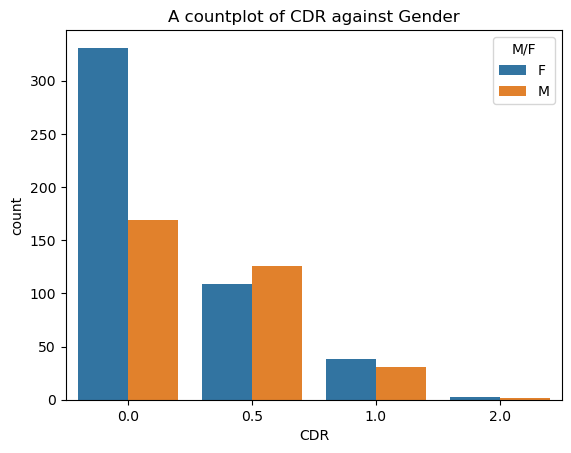

In [68]:
# comparing CDR and M/F columns
bivariate("CDR", "M/F");

Females make up the majority for non-demented(CDR = 0) group while males are the majority in all the demented (CDR = 0.5,1,2) groups.


In [69]:
# function to plot kde plots
def plot_bivariate(df,col, y = 0):
    '''A function To visualize KDE Plots'''
    facet= sns.FacetGrid(df, aspect=3,hue = "CDR").set(title= f"KDE Plot for {col}")
    facet.map(sns.kdeplot, col ,shade= True)
    facet.set(xlim=(y, df[col].max()))
    facet.add_legend();

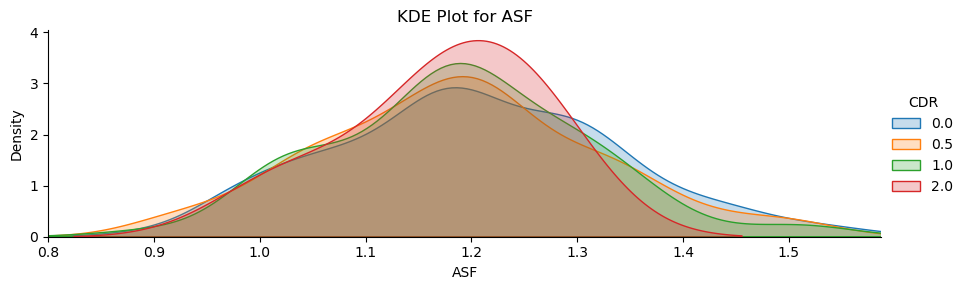

In [70]:
#Plotting the KDE Plot for ASF
plot_bivariate(merged_df,"ASF", y = 0.8)

The plots for ASF are all normaly distributed with the highest probability density for ASF being 1.2

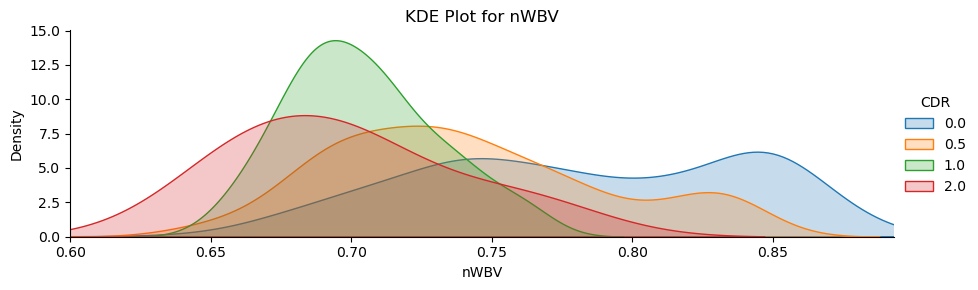

In [71]:
#Plotting the KDE Plot for nWBV
plot_bivariate(merged_df,"nWBV", y = 0.6)

The plots for very mildly demented, mildly demented and moderately demented are positively skewed with the highest Normalized whole-brain volume being approximately 0.7.
The KDE plot for non demented is negatively skewed with the highest Normalized whole-brain volume being approximately 0.85.

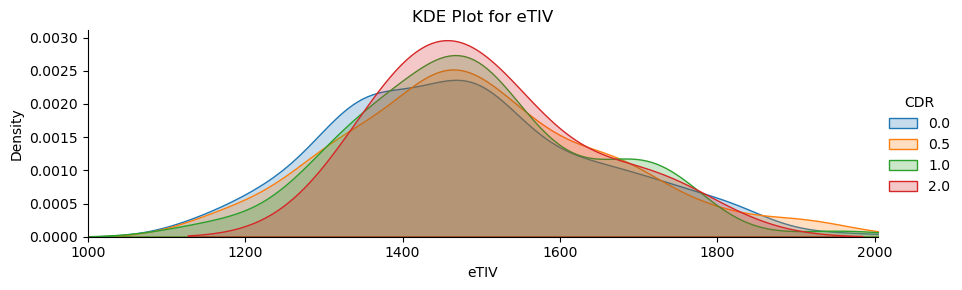

In [72]:
#Plotting the KDE Plot for eTIV
plot_bivariate(merged_df,"eTIV", y = 1000)

In [73]:
merged_df.columns


Index(['M/F', 'Age', 'Educ', 'SES', 'MMSE', 'CDR', 'eTIV', 'nWBV', 'ASF'], dtype='object')

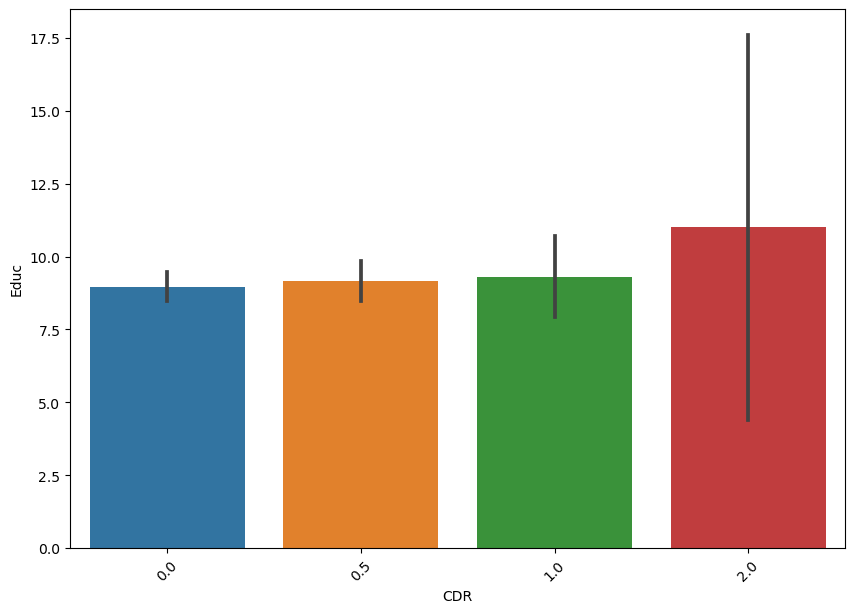

The plots for eTIV are all normally distributed with the highest probability density being approximately 1500 mm3.

In [ ]:
#Plotting the KDE Plot for MMSE
plot_bivariate(merged_df,"MMSE", y = 10)

The plots for very mildly demented and non-demented are negatively skewed with the average MMSE score for non demented being approximately 30 while that for very mildly demented being approximately 26.
The average MMSE score for mildly demented is approximately 21.
The average MMSE score for moderately demented is approximately 15.

In [ ]:
#Plotting the KDE Plot for SES
plot_bivariate(merged_df,"SES")

People in SES classes 1 and 2 have a higher probability of being non-demented than those in the lower classes(SES 3,4 and 5).

In [ ]:
#Plotting the KDE Plot for Educ
plot_bivariate(merged_df,"Educ")

People with 5 years and below of education have a high chance of being non demented.
People with 10-15 years of education have a high chance of either being very mildly or mildly demented.
Chances of moderate dementia is not greatly affected by increase is years of education.


In [ ]:
#Plotting the KDE Plot for Age
plot_bivariate(merged_df,"Age")

The plots for age are negatively skewed in all CDR ratings with the highest probability of having dementia being around 75 years.

#### Summary of Bivariate Analysis

* The average Normalized whole-brain volume for non demented people  is approximately 85% while that of demented  is approximately 70%.
* The average Estimated total intracranial volume is approximately 1500 mm3 for demented and non demented people
* The average MMSE score for non demented is approximately 30 while that for very mildly demented is 26.
* The average MMSE score for mildly demented is approximately 21.
* The average MMSE score for moderately demented is approximately 15.
* People in SES classes 1 and 2 have a higher probability of being non-demented than those in the lower classes (SES 3,4 and 5).
* People with 5 years and below of education have a high chance of being non demented.
* People with 10-15 years of education have a high chance of either being very mildly or mildly demented.
* Chances of moderate dementia are not greatly affected by increases in years of education.


In [ ]:
#To visualize the correlation of the data, I shall use a heatmap.
sns.heatmap(merged_df.corr(), annot=True);

This shows the correlation of all the different variables with each other. The strongest correlation in the data is between age and education ar 0.39.